# Data Processing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 1. Data import

data = pd.read_csv("./Data/data_train.csv")

In [7]:
# 2
data.head()

,Unnamed: 0,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,797.0,-200.0,2.1,593.0,146.0,1212.0,72.0,984.0,494.0,10.8,49.7,0.6429
1,1,1282.0,-200.0,11.0,1013.0,354.0,545.0,141.0,1384.0,1287.0,17.4,50.6,0.9989
2,2,891.0,-200.0,7.6,882.0,342.0,885.0,149.0,950.0,894.0,7.8,33.9,0.3594
3,3,1285.0,-200.0,18.1,1243.0,481.0,599.0,173.0,1815.0,1582.0,26.4,41.9,1.4237
4,4,892.0,-200.0,7.3,869.0,71.0,953.0,77.0,1363.0,632.0,37.4,14.7,0.9295


In [8]:
# 3
data.shape

(6250, 13)

In [9]:
data.describe(include = "all")

,Unnamed: 0,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6250.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000
mean,3124.500000,1053.137534,-159.131865,2.105864,900.956747,172.548032,789.718775,59.277175,1400.209785,983.046331,10.014256,39.573530,-6.751036
std,1804.363923,330.409118,141.196552,41.223190,343.097628,259.096948,320.048320,126.634023,466.410914,459.039659,43.027677,51.004857,38.788226
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,1562.250000,924.000000,-200.000000,4.100000,715.000000,52.000000,631.000000,54.000000,1199.000000,703.000000,11.200000,34.000000,0.707100
50%,3124.500000,1055.000000,-200.000000,8.100000,903.000000,142.000000,790.000000,97.000000,1454.000000,951.000000,17.300000,48.600000,0.984100
75%,4686.750000,1226.000000,-200.000000,14.000000,1117.000000,293.000000,954.000000,134.000000,1669.000000,1274.000000,24.300000,61.800000,1.302900
max,6249.000000,2008.000000,1129.000000,63.700000,2214.000000,1389.000000,2683.000000,340.000000,2775.000000,2519.000000,44.600000,87.200000,2.180600


In [10]:
# 3. Checking the number of missing values in each column.
data.isnull().sum()

Unnamed: 0        0
PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64

In [11]:
data = data.drop(data.columns[0], axis=1)

In [12]:
# 4. Drop rows with missing data
data.dropna(inplace = True)

In [13]:
# check if all rows with missing data have been dropped
data.isnull().sum()

PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
data.shape

(6173, 12)

In [15]:
# Function to remove outliers using Z score
def remove_outliers(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

In [16]:
# function to standardize data
# we save the mean and SD for each column - this will be used to standardize the test data as well!
def standardize_features(df):
    standardized_df = df.copy()
    column_stats = {}

    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        column_stats[column] = {'mean': mean, 'std': std}
        standardized_df[column] = (df[column] - mean) / std

    return standardized_df, column_stats

# Exploratory Data Analysis

array([[<Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>],
       [<Axes: title={'center': 'NO2(GT)'}>,
        <Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>],
       [<Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'AH'}>]], dtype=object)

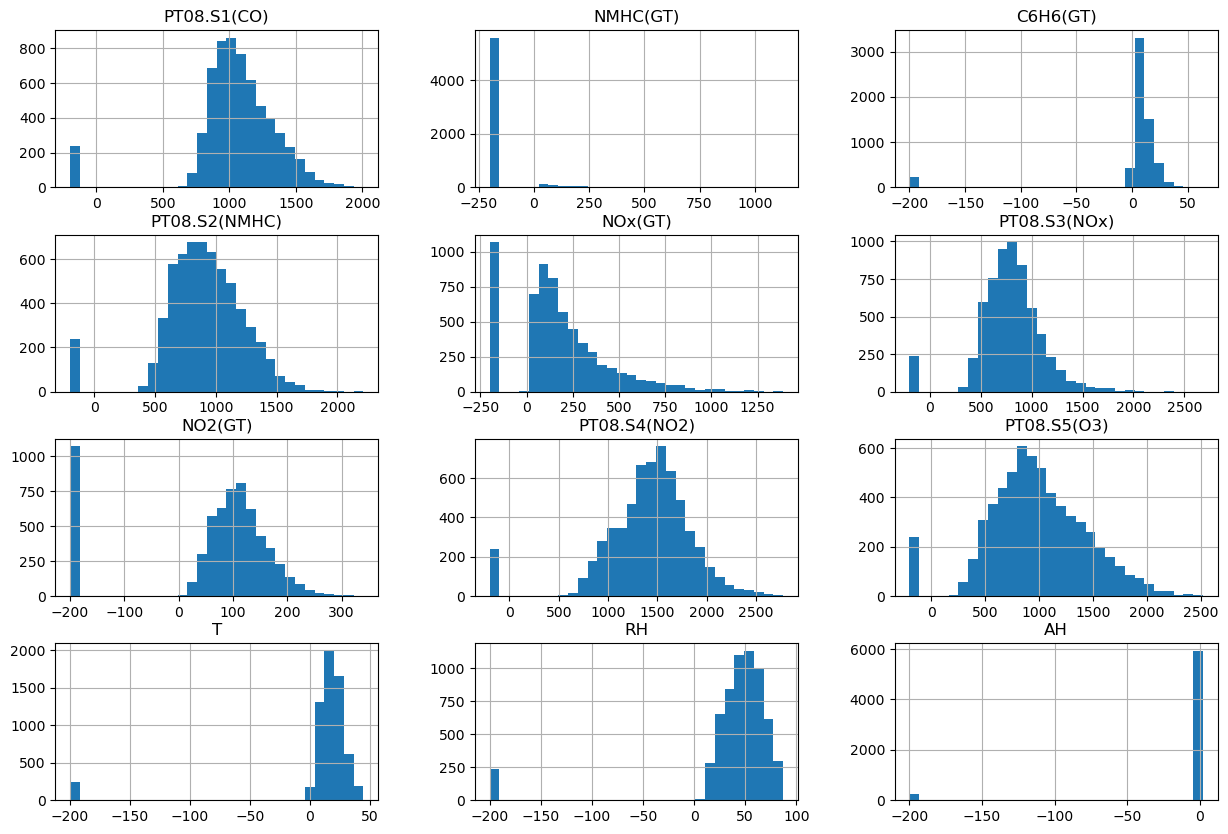

In [17]:
# Histogram of X vaiables 
data.hist(bins=30, figsize=(15, 10))

In [18]:
# Removing outliers from the data
# it was realized looking at the 
# X var histogram that there were a lot of outliers in some colums
# owing to this, a decision was made to remove the outliers from teh data
# since I dropped the oulier columns instead of imputing them, i dropped the rows before X, y split
# decision to drop was made based on the number of outliers- i wasnt losing more than 10 % of the data by this drop
# 5654/6250 = 90% data remains after this drop which looks fair- i would have used imputation if mroe than 10% data was being lost

data = remove_outliers(data)

In [19]:
# 5. Extract data labels X and y from the data

y = data["PT08.S1(CO)"]
X = data[["NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]

In [20]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X

,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-200.0,2.1,593.0,146.0,1212.0,72.0,984.0,494.0,10.8,49.7,0.6429
1,-200.0,11.0,1013.0,354.0,545.0,141.0,1384.0,1287.0,17.4,50.6,0.9989
2,-200.0,7.6,882.0,342.0,885.0,149.0,950.0,894.0,7.8,33.9,0.3594
3,-200.0,18.1,1243.0,481.0,599.0,173.0,1815.0,1582.0,26.4,41.9,1.4237
4,-200.0,7.3,869.0,71.0,953.0,77.0,1363.0,632.0,37.4,14.7,0.9295
...,...,...,...,...,...,...,...,...,...,...,...
5649,-200.0,4.5,737.0,220.0,1007.0,105.0,1030.0,703.0,9.6,53.9,0.6425
5650,-200.0,2.2,602.0,54.0,1138.0,44.0,1337.0,593.0,21.1,63.8,1.5817
5651,-200.0,3.7,694.0,156.0,876.0,116.0,976.0,663.0,7.7,53.0,0.5572
5652,-200.0,4.0,709.0,46.0,997.0,53.0,1432.0,853.0,24.0,37.8,1.1077


In [21]:
# Standardize X
# ILooking at the mean and standard dev of each feature column, I realized that they are not on same scale
# Data being weather quality metrics, its clear that they have different units and quite different ranges
# Intuitively it is clear that standardization qould be required.
# apart from that, I also tried to train the mdoel using non-standardized data but I realized that tuning was
# very difficult and sensitive in that case
# Hence, a decision was made to standardize the X data
# As mentioned previosult, we have stored the mean and SD for each column to standardize the test data later

# Normalizing the data using Z-Score Normalization
from sklearn.preprocessing import StandardScaler

columns = X.columns
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using the scaler
X = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X = pd.DataFrame(X, columns=columns)
X.head()


,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-0.26479,-1.106015,-1.329034,-0.042533,1.586600,0.142478,-1.395450,-1.358098,-0.878444,0.032124,-0.978633
1,-0.26479,0.177768,0.324590,0.819144,-1.189607,0.682992,-0.193481,0.732238,-0.137373,0.083743,-0.101989
2,-0.26479,-0.312666,-0.191183,0.769431,0.225551,0.745660,-1.497617,-0.303704,-1.215294,-0.874075,-1.676747
3,-0.26479,1.201910,1.230146,1.345264,-0.964847,0.933665,1.101641,1.509854,0.873177,-0.415240,0.944075
4,-0.26479,-0.355939,-0.242367,-0.353234,0.508583,0.181645,-0.256584,-0.994332,2.108295,-1.975279,-0.272885


Text(0, 0.5, 'NO2(GT)')

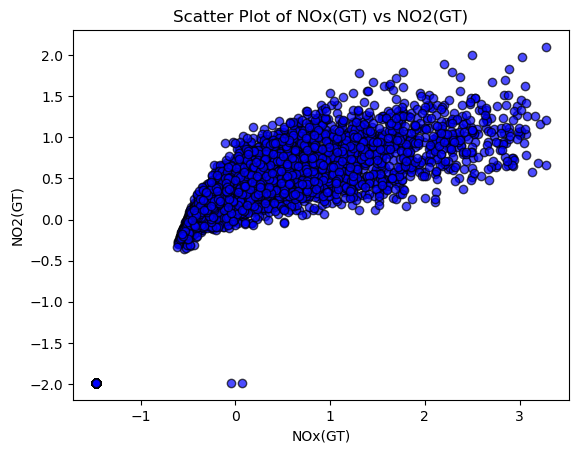

In [22]:
# 2. Pick 2 features and plot scatter plot
# we can see in the scatter plot that there is hihg correlation between NOx (GT) and NO2(GT)
# NO2(GT) has a direct positive correlation with NOx (GT) as per the plot
two_feature_corr = plt.scatter(X["NOx(GT)"], X["NO2(GT)"], color='blue', alpha=0.7, edgecolors='black')
plt.title("Scatter Plot of NOx(GT) vs NO2(GT)")
plt.xlabel("NOx(GT)")
plt.ylabel("NO2(GT)")

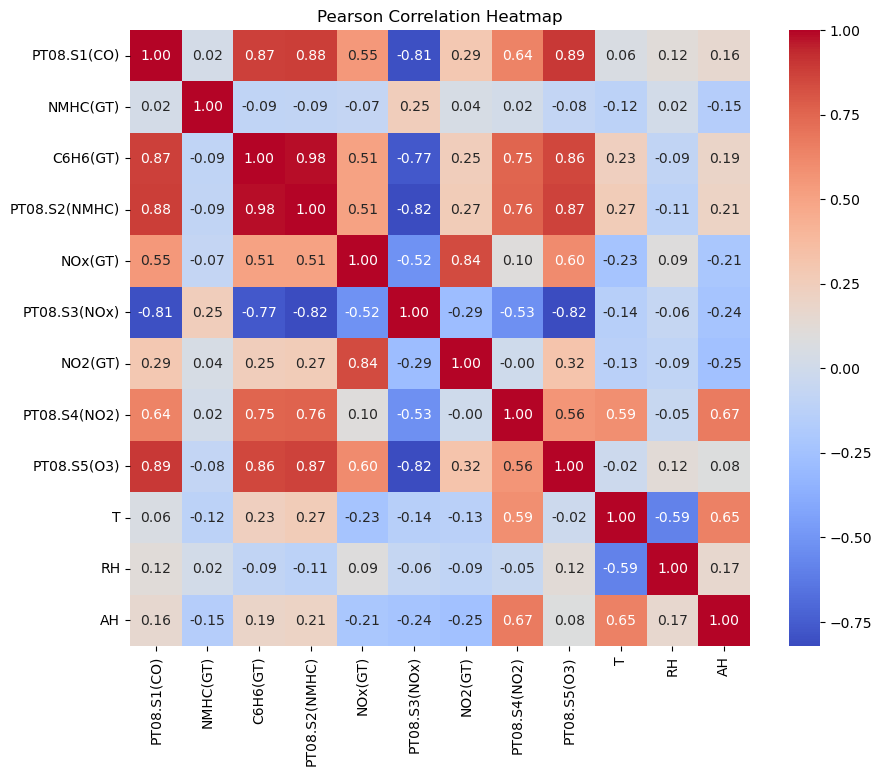

In [23]:
# Pearson co-efficient is calculate dbetween all 1-12 features
# correlation_matrix is C where C(i,j) represents the correlation co-eff between feature i and j

correlation_matrix = data.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

In [24]:
X_selected_feature = X[["C6H6(GT)"]]
X_all_features = X

In [25]:
# Linear Regression model

class LinearRegressionModelN:
    def __init__(self, alpha = 0.001, max_iter = 10000):
        self.alpha = alpha
        self.max_iter = max_iter
        
    def fit(self, X, y):
        n = X.shape[0]  # Number of samples
        X_extended = np.concatenate([X, np.ones((n, 1))], axis=1)  # Add a column of ones to X to account for the intercept term
        w = np.zeros((X_extended.shape[1], 1))  # Initialize weights as zeros
        y = y.values.reshape(-1, 1)
        
        for i in range(self.max_iter):  # Iterate for a maximum of max_iter times
            yhat = np.matmul(X_extended, w)  # Compute the dot product of X_extended and weights
            grad = np.matmul(X_extended.T, (yhat - y)) / n  # Compute the gradient of the loss function with respect to the weights
            w -= self.alpha * grad  # Update weights using gradient descent

        return w


    def predict(self, X_test, w):
        n = X_test.shape[0]
        X_test_extended = np.concatenate([X_test, np.ones((n, 1))], axis=1)  # Add a column of ones to X to account for the intercept term
        ypred = np.matmul(X_test_extended, w)
        return ypred

In [26]:
# Linear Regression Model 

model = LinearRegressionModelN(alpha = 0.001, max_iter = 10000)
updated_params_linear_all_X = model.fit(X_all_features, y)

In [27]:
print(updated_params_linear_all_X)

[[  25.51933173]
 [  39.79901969]
 [  33.8072967 ]
 [  12.53251865]
 [ -45.10925022]
 [  -4.20896722]
 [  24.62455144]
 [  59.44317705]
 [  -6.73132754]
 [  16.71239954]
 [  -7.18248934]
 [1088.23205553]]


In [28]:
## Using only selected features

In [29]:
# Linear Regression Model using single variable

alpha = 0.001
n_iter = 10000

model = LinearRegressionModelN(alpha = 0.001, max_iter = 10000)
updated_params_linear_selected_X = model.fit(X_selected_feature, y)

In [30]:
print(updated_params_linear_selected_X)

[[ 175.61174727]
 [1088.23205553]]


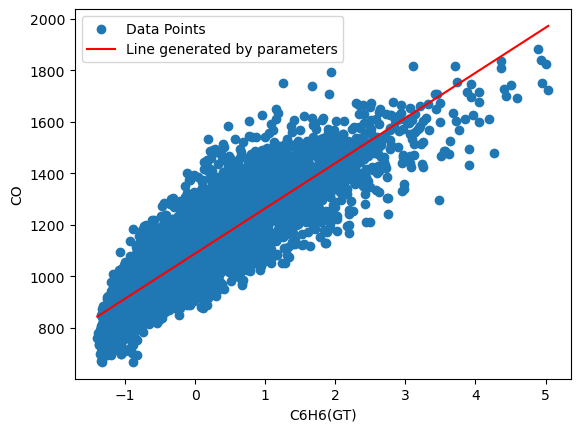

In [31]:
X2 = X_selected_feature
plt.scatter(X2, y, label='Data Points')

# Plot the line generated by parameters
X_line = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)  # Generating X values for line
y_line = updated_params_linear_selected_X[1] + updated_params_linear_selected_X[0] * X_line  # Calculating y values for line
plt.plot(X_line, y_line, color='red', label='Line generated by parameters')

# Add labels and legend
plt.xlabel('C6H6(GT)')
plt.ylabel('CO')
plt.legend()

# Show plot
plt.show()

In [32]:
# Cross validation

In [33]:
def get_k_folds(df, k):
    fold_size = len(df) // k
    idx = np.arange(len(df))
    folds = []
    for i in range(k):
        start = i * fold_size
        end = min((i + 1) * fold_size, len(df)) 
        idx_test = idx[start:end]
        idx_train = np.concatenate([idx[:start], idx[end:]])
        folds.append((idx_train, idx_test))
    return folds

In [34]:
fold_idx = get_k_folds(X_all_features, 5)
print(len(fold_idx[2][0])+len(fold_idx[2][1]))
print(X_all_features.shape)

5654
(5654, 11)


In [35]:
def RMSE(y_actual, y_pred):
    y_actual = np.array(y_actual)
    mse = np.mean((y_pred - y_actual) ** 2)
    return np.sqrt(mse)


In [36]:
# tune : updated_params_linear_all_X

rmse_scores = []
fold_idx = get_k_folds(X_all_features, 5)
rmse_min = float('inf')

for train_indices, test_indices in fold_idx:
    X_train, y_train = X_all_features.iloc[train_indices], y[train_indices]
    X_test, y_test = X_all_features.iloc[test_indices], y[test_indices]

    model = LinearRegressionModelN(alpha = 0.01, max_iter = 1000)

    w = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test, w)

    y_pred = pd.Series(y_pred.flatten())
    
    fold_rmse_score = RMSE(y_test, y_pred)
    
    if fold_rmse_score < rmse_min:
        updated_params_linear_all_X = w
        selectedLinearModel = model

    rmse_scores.append(fold_rmse_score)
    

mean_rmse = np.mean(rmse_scores)
sd_rmse = np.std(rmse_scores)

print("K-Fold Cross-Validation RMSE Scores:", rmse_scores)
print("K-Fold Cross-Validation mean rmse:", mean_rmse)
print("K-Fold Cross-Validation sd of rmse:", sd_rmse)
print("tuned parameters: ", updated_params_linear_all_X)


K-Fold Cross-Validation RMSE Scores: [69.96440727077882, 70.41900793357841, 66.33280081352281, 73.24007966647801, 73.10908294089585]
K-Fold Cross-Validation mean rmse: 70.61307572505078
K-Fold Cross-Validation sd of rmse: 2.5262774241692125
tuned parameters:  [[  26.09781799]
 [  37.62038648]
 [  33.70905956]
 [  14.14175619]
 [ -46.69232673]
 [  -4.64923455]
 [  24.33126474]
 [  59.40219561]
 [  -6.31009906]
 [  15.97751334]
 [  -6.8441982 ]
 [1087.33681107]]


# Logistic regression

In [37]:
X.shape

(5654, 11)

In [38]:
y.shape

(5654,)

In [39]:
y = pd.DataFrame(y)
y

,PT08.S1(CO)
0,797.0
1,1282.0
2,891.0
3,1285.0
4,892.0
...,...
5649,918.0
5650,824.0
5651,1003.0
5652,894.0


In [40]:
# convert the target variable to binary
threshold = 1000
y_bin = (y['PT08.S1(CO)'] > threshold).astype(int)
pd.DataFrame(y_bin)

,PT08.S1(CO)
0,0
1,1
2,0
3,1
4,0
...,...
5649,0
5650,0
5651,1
5652,0


In [41]:
class LogisticRegressionModelN:
    def __init__(self, alpha = 0.01, lambdaa = 0.01, max_iter = 10000):
        self.alpha = alpha
        self.lambdaa = lambdaa
        self. max_iter = max_iter
        
    def fit(self, X, y):
        n = X.shape[0]  # Number of samples
        X_extended = np.concatenate([X, np.ones((n, 1))], axis=1)  # Add a column of ones to X to account for the intercept term
        w = np.zeros((X_extended.shape[1], 1))  # Initialize weights as zeros
        y = y.values.reshape(-1, 1)
        for i in range(self.max_iter):
            logits  = np.matmul(X_extended, w)
            grad    = (((1/(1+np.exp(-logits)))-y) * X_extended).mean(axis=0, keepdims=True).T + 2 * self.lambdaa * w
            w -= self.alpha * grad
            
        return w

    def predict(self, X, w):
        X_extended = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        logits     = np.matmul(X_extended, w)
        return np.round(1/(1+np.exp(-logits)))

In [42]:
# train logistic regression

model = LogisticRegressionModelN(max_iter = 10000, alpha = 0.01, lambdaa = 0.01)
modified_logistic_params = model.fit(X_all_features, y_bin)
print(modified_logistic_params)

[[ 0.42566529]
 [ 0.51716164]
 [ 0.75832525]
 [ 0.12068744]
 [-0.99515838]
 [ 0.13892753]
 [ 0.48086831]
 [ 0.79416483]
 [-0.01908835]
 [ 0.25861525]
 [-0.08050225]
 [ 1.08922773]]


In [43]:
def precision(y_pred, y_actual):
    true_positives = sum((pred == 1) and (actual == 1) for pred, actual in zip(y_pred, y_actual))
    false_positives = sum((pred == 1) and (actual == 0) for pred, actual in zip(y_pred, y_actual))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    return precision

def accuracy(y_pred, y_actual):
    correct_predictions = sum(pred == actual for pred, actual in zip(y_pred, y_actual))
    total_predictions = len(y_pred)
    accuracy = correct_predictions / total_predictions
    return accuracy

def f1(y_pred, y_actual):
    prec = precision(y_pred, y_actual)
    rec = recall(y_pred, y_actual)
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0
    return f1

def recall(y_pred, y_actual):
    true_positives = sum((pred == 1) and (actual == 1) for pred, actual in zip(y_pred, y_actual))
    false_negatives = sum((pred == 0) and (actual == 1) for pred, actual in zip(y_pred, y_actual))
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    return recall

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def get_pred_probs(x_test, coefficients):
    # Add a column of ones to X_test to account for the intercept term
    X_test_extended = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)

    # Calculate linear combination of features and coefficients
    linear_combination = np.matmul(X_test_extended, coefficients)

    # Calculate predicted probabilities using sigmoid function
    y_pred_prob = sigmoid(linear_combination)

    return y_pred_prob

import numpy as np

In [45]:
from sklearn.metrics import roc_curve, auc as calculate_auc

def logistic_regression_roc_auc_sklearn(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc_score = calculate_auc(fpr, tpr)
    return roc_auc_score, fpr, tpr


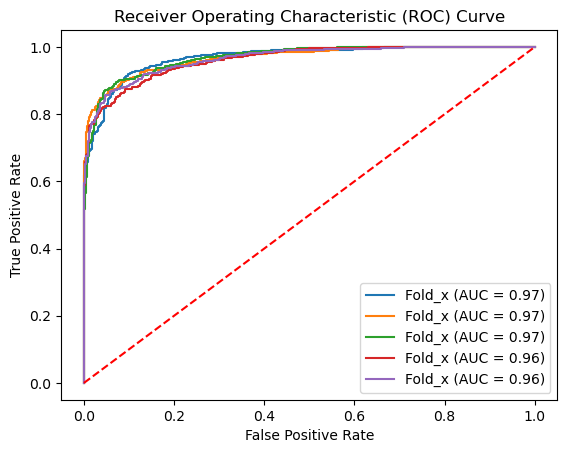

K-Fold Cross-Validation accuracy: [0.9123893805309734, 0.9017699115044248, 0.9053097345132743, 0.8823008849557522, 0.8991150442477877]
K-Fold Cross-Validation precision: [0.9203539823008849, 0.8961593172119487, 0.9039301310043668, 0.886685552407932, 0.917963224893918]
K-Fold Cross-Validation recall: [0.9327354260089686, 0.9431137724550899, 0.9380664652567976, 0.9219440353460973, 0.9205673758865248]
K-Fold Cross-Validation f1: [0.9265033407572383, 0.9190371991247265, 0.9206819866567828, 0.903971119133574, 0.9192634560906516]
K-Fold Cross-Validation auc: [0.9679170908711202, 0.9672730785759259, 0.9680391403064325, 0.9617196269175263, 0.9641611577571131]
#######################################################################
Mean Accuracy: 0.9001769911504425
Mean Precision: 0.9050184415638102
Mean recall: 0.9312854149906956
Mean f1: 0.9178914203525947
Mean auc: 0.9658220188856236
#######################################################################
STD Accuracy: 0.009987069720117429
STD

In [46]:
accuracy_scores, precision_scores, recall_scores, f1_scores, auc_vals = [], [], [], [], []

fold_idx = get_k_folds(X_all_features, 5)
max_f1 = float('-inf')

for train_indices, test_indices in fold_idx:
    X_train, y_train = X_all_features.iloc[train_indices], y_bin[train_indices]
    X_test, y_test = X_all_features.iloc[test_indices], y_bin[test_indices]
    
    model = LogisticRegressionModelN(max_iter = 10000, alpha = 0.01, lambdaa = 0.01)
    w = model.fit(X_train, y_train)

    y_pred = model.predict(X_test, w)
    y_pred = pd.Series(y_pred.flatten())
    
    fold_precision_score = precision(y_test, y_pred)
    fold_accuracy_score = accuracy(y_test, y_pred)
    fold_f1_score = f1(y_test, y_pred)
    fold_recall_score = recall(y_test, y_pred)
    
    if fold_f1_score > max_f1:
        modified_logistic_params = w
        selectedLogisticModel = model
    
    pred_prob_test = get_pred_probs(X_test, w)
    pred_prob_test = pd.Series(pred_prob_test.flatten())
    auc, fpr, tpr = logistic_regression_roc_auc_sklearn(y_test, pred_prob_test) 

    plt.plot(fpr, tpr, label=f'Fold_x (AUC = {auc:.2f})')
    
    accuracy_scores.append(fold_accuracy_score)
    precision_scores.append(fold_precision_score)
    recall_scores.append(fold_recall_score)
    f1_scores.append(fold_f1_score)
    auc_vals.append(auc)

    
    
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate the mean accuracy across all folds

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_vals)

sd_accuracy = np.std(accuracy_scores)
sd_precision = np.std(precision_scores)
sd_recall = np.std(recall_scores)
sd_f1 = np.std(f1_scores)
sd_auc = np.std(auc_vals)

print("K-Fold Cross-Validation accuracy:", accuracy_scores)
print("K-Fold Cross-Validation precision:", precision_scores)
print("K-Fold Cross-Validation recall:", recall_scores)
print("K-Fold Cross-Validation f1:", f1_scores)
print("K-Fold Cross-Validation auc:", auc_vals)
print("#######################################################################")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean recall:", mean_recall)
print("Mean f1:", mean_f1)
print("Mean auc:", mean_auc)
print("#######################################################################")
print("STD Accuracy:", sd_accuracy)
print("STD precision:", sd_precision)
print("STD recall:", sd_recall)
print("STD f1:", sd_f1)
print("STD auc:", sd_auc)

In [47]:
# using sklearn logistic regression model

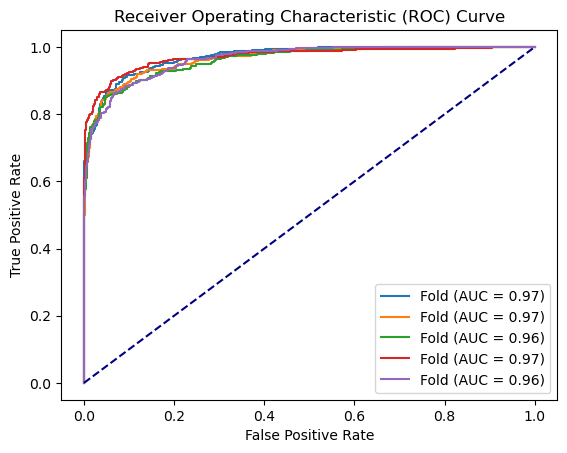

K-Fold Cross-Validation accuracy: [0.9036251105216623, 0.900972590627763, 0.887709991158267, 0.9133510167992926, 0.8849557522123894]
K-Fold Cross-Validation precision: [0.9155749636098981, 0.9240875912408759, 0.9052333804809052, 0.9341736694677871, 0.9002849002849003]
K-Fold Cross-Validation recall: [0.925, 0.9134199134199135, 0.9142857142857143, 0.9289693593314763, 0.9132947976878613]
K-Fold Cross-Validation f1: [0.9202633504023408, 0.918722786647315, 0.9097370291400142, 0.9315642458100558, 0.9067431850789095]
K-Fold Cross-Validation auc: [0.9708817007956175, 0.9650978144128829, 0.9612761020881669, 0.9713692190440218, 0.9646415657085544]
#######################################################################
Mean Accuracy: 0.8981228922638749
Mean Precision: 0.9158709010168733
Mean recall: 0.918993956944993
Mean f1: 0.917406119415727
Mean auc: 0.9666532804098488
#######################################################################
STD Accuracy: 0.010508025979776323
STD precision: 0.0

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, accuracy_score, f1_score, recall_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores, precision_scores, recall_scores, f1_scores, auc_vals = [], [], [], [], []

for train_index, test_index in kf.split(X_all_features):
    X_train, X_test = X_all_features.iloc[train_index], X_all_features.iloc[test_index]
    y_train, y_test = y_bin[train_index], y_bin[test_index]
    
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

    auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    y_pred = logreg.predict(X_test)

    fold_precision_score = precision_score(y_test, y_pred)
    fold_accuracy_score = accuracy_score(y_test, y_pred)
    fold_f1_score = f1_score(y_test, y_pred)
    fold_recall_score = recall_score(y_test, y_pred)
        
    plt.plot(fpr, tpr, label=f'Fold (AUC = {auc:.2f})')
    
    accuracy_scores.append(fold_accuracy_score)
    precision_scores.append(fold_precision_score)
    recall_scores.append(fold_recall_score)
    f1_scores.append(fold_f1_score)
    auc_vals.append(auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate the mean and standard deviation of the scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_vals)

sd_accuracy = np.std(accuracy_scores)
sd_precision = np.std(precision_scores)
sd_recall = np.std(recall_scores)
sd_f1 = np.std(f1_scores)
sd_auc = np.std(auc_vals)

print("K-Fold Cross-Validation accuracy:", accuracy_scores)
print("K-Fold Cross-Validation precision:", precision_scores)
print("K-Fold Cross-Validation recall:", recall_scores)
print("K-Fold Cross-Validation f1:", f1_scores)
print("K-Fold Cross-Validation auc:", auc_vals)
print("#######################################################################")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean recall:", mean_recall)
print("Mean f1:", mean_f1)
print("Mean auc:", mean_auc)
print("#######################################################################")
print("STD Accuracy:", sd_accuracy)
print("STD precision:", sd_precision)
print("STD recall:", sd_recall)
print("STD f1:", sd_f1)
print("STD auc:", sd_auc)


# Predictions using test data

In [49]:
test_data = pd.read_csv("./Data/data_test.csv")

In [50]:
test_data = test_data[["NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]
test_data

,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-200.0,8.0,898.0,122.0,933.0,105.0,1594.0,1098.0,17.0,51.7,0.9914
1,-200.0,19.4,1281.0,-200.0,774.0,-200.0,1952.0,1324.0,20.8,43.6,1.0614
2,-200.0,9.9,975.0,349.0,638.0,223.0,1243.0,1064.0,5.6,74.6,0.6826
3,-200.0,12.7,1075.0,103.0,749.0,98.0,1690.0,1022.0,31.7,21.5,0.9902
4,-200.0,2.9,647.0,131.0,1054.0,85.0,962.0,828.0,8.4,54.5,0.6022
...,...,...,...,...,...,...,...,...,...,...,...
3216,-200.0,12.5,1068.0,171.0,899.0,139.0,1663.0,1374.0,23.8,28.2,0.8219
3217,-200.0,9.6,964.0,-200.0,953.0,-200.0,1513.0,770.0,26.3,24.8,0.8393
3218,-200.0,1.2,522.0,61.0,1242.0,55.0,1070.0,471.0,10.8,78.7,1.0202
3219,-200.0,8.7,927.0,-200.0,750.0,-200.0,1659.0,727.0,34.0,33.2,1.7395


In [51]:
# test data has blanks and NaNs - check
test_data.isna().sum()


NMHC(GT)         37
C6H6(GT)         37
PT08.S2(NMHC)    37
NOx(GT)          37
PT08.S3(NOx)     37
NO2(GT)          37
PT08.S4(NO2)     37
PT08.S5(O3)      37
T                37
RH               37
AH               37
dtype: int64

In [52]:
test_data = test_data.dropna()
test_data.isna().sum()

NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [53]:
test_data.reset_index(inplace=True)
test_data

,index,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,-200.0,8.0,898.0,122.0,933.0,105.0,1594.0,1098.0,17.0,51.7,0.9914
1,1,-200.0,19.4,1281.0,-200.0,774.0,-200.0,1952.0,1324.0,20.8,43.6,1.0614
2,2,-200.0,9.9,975.0,349.0,638.0,223.0,1243.0,1064.0,5.6,74.6,0.6826
3,3,-200.0,12.7,1075.0,103.0,749.0,98.0,1690.0,1022.0,31.7,21.5,0.9902
4,4,-200.0,2.9,647.0,131.0,1054.0,85.0,962.0,828.0,8.4,54.5,0.6022
...,...,...,...,...,...,...,...,...,...,...,...,...
3179,3216,-200.0,12.5,1068.0,171.0,899.0,139.0,1663.0,1374.0,23.8,28.2,0.8219
3180,3217,-200.0,9.6,964.0,-200.0,953.0,-200.0,1513.0,770.0,26.3,24.8,0.8393
3181,3218,-200.0,1.2,522.0,61.0,1242.0,55.0,1070.0,471.0,10.8,78.7,1.0202
3182,3219,-200.0,8.7,927.0,-200.0,750.0,-200.0,1659.0,727.0,34.0,33.2,1.7395


In [54]:
# Fit and transform the features using the scaler
columns = test_data.columns 
test_data = scaler.fit_transform(test_data)
# Convert the scaled features back to a DataFrame
test_data = pd.DataFrame(test_data, columns=columns)

print(test_data.head())

      index  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0 -1.736123 -0.299161  0.158353       0.046219 -0.153522      0.392610   
1 -1.735046 -0.299161  0.431872       1.171008 -1.421210     -0.095887   
2 -1.733968 -0.299161  0.203939       0.272352  0.740158     -0.513721   
3 -1.732891 -0.299161  0.271119       0.566030 -0.228324     -0.172695   
4 -1.731814 -0.299161  0.035989      -0.690914 -0.118090      0.764359   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0  0.384605      0.468609     0.305873  0.176374  0.239923  0.203281  
1 -2.007478      1.233089     0.805391  0.263652  0.083016  0.205060  
2  1.310067     -0.280923     0.230724 -0.085460  0.683526  0.195431  
3  0.329705      0.673610     0.137894  0.514002 -0.345089  0.203250  
4  0.227747     -0.880976    -0.290896 -0.021150  0.294163  0.193387  


In [55]:
test_data = test_data[["NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]
test_data

,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-0.299161,0.158353,0.046219,-0.153522,0.392610,0.384605,0.468609,0.305873,0.176374,0.239923,0.203281
1,-0.299161,0.431872,1.171008,-1.421210,-0.095887,-2.007478,1.233089,0.805391,0.263652,0.083016,0.205060
2,-0.299161,0.203939,0.272352,0.740158,-0.513721,1.310067,-0.280923,0.230724,-0.085460,0.683526,0.195431
3,-0.299161,0.271119,0.566030,-0.228324,-0.172695,0.329705,0.673610,0.137894,0.514002,-0.345089,0.203250
4,-0.299161,0.035989,-0.690914,-0.118090,0.764359,0.227747,-0.880976,-0.290896,-0.021150,0.294163,0.193387
...,...,...,...,...,...,...,...,...,...,...,...
3179,-0.299161,0.266321,0.545473,0.039386,0.288152,0.651263,0.615953,0.915903,0.332556,-0.215302,0.198972
3180,-0.299161,0.196741,0.240047,-1.421210,0.454056,-2.007478,0.295640,-0.419090,0.389975,-0.281164,0.199415
3181,-0.299161,-0.004799,-1.058012,-0.393674,1.341954,-0.007540,-0.650351,-1.079956,0.033973,0.762948,0.204013
3182,-0.299161,0.175148,0.131386,-1.421210,-0.169623,-2.007478,0.607412,-0.514131,0.566828,-0.118445,0.222298


In [56]:
pred_linear = selectedLinearModel.predict(test_data,updated_params_linear_all_X)
pred_series_linear = pd.Series(pred_linear.flatten())

print(pred_series_linear)

#pred_series_linear.to_excel("predicted_linear.xlsx")


0       1095.654127
1       1205.066020
2       1141.738582
3       1126.543893
4        983.969415
           ...     
3179    1154.503830
3180    1037.037007
3181     906.096786
3182    1064.950208
3183    1108.471823
Length: 3184, dtype: float64


In [57]:
pred_logistic = selectedLogisticModel.predict(test_data,modified_logistic_params)
pred_series_logistic = pd.Series(pred_logistic.flatten())
#print(pred_series_logistic.sum())

#pred_series_logistic.to_excel("predicted_logictic.xlsx")

In [58]:
# final csv result file
results = pd.DataFrame({'pred_linear': pred_series_linear, 'pred_logistic': pred_series_logistic})
results.to_csv('Neha_Joshi_preds.csv')

In [59]:
# EOF